In [265]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [275]:
from deluca.agents import GPC, Adaptive
from deluca.envs import LDS
import jax.numpy as jnp
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [280]:
cummean = lambda x: np.cumsum(x)/(np.ones(T) + np.arange(T))

In [267]:
n, m = 2, 1

In [304]:
def get_errs(T, controller, A, B, noise):
    state = jnp.zeros((n, 1))
    errs = [0.]
    
    for i in tqdm(range(1, T)):
        
        try:
            action = controller(state, A, B)
        except:
            action = controller(state)
            
        if(noise=="normal"):
            state = A @ state + B @ action + np.random.normal(0, 0.2, size=(n,1)) # gaussian noise
        else:
            state = A @ state + B @ action + np.random.normal(0, 0.2, size=(n,1)) *(i%300 < 150) + 0.4 * jnp.sin(i) *(i%300>= 150) # add sine noise every 150 steps
        
        if(i % T//2 == 0): # switch system
            A,B = jnp.array([[1.,1.5], [0,1.]]), jnp.array([[0],[0.9]])
        
        errs.append(jnp.linalg.norm(state)+jnp.linalg.norm(action))
    
    return errs

In [289]:
T = 600

In [290]:
ada = Adaptive(T, base_controller=GPC, A=A, B=B)
gpc = GPC(A, B)

  0%|          | 0/599 [00:00<?, ?it/s]

GPC incurs  0.9258076644067963  loss under gaussian iid noise


100%|██████████| 599/599 [01:47<00:00,  5.57it/s]

AdaGPC incurs  0.7698232416187724  loss under gaussian iid noise


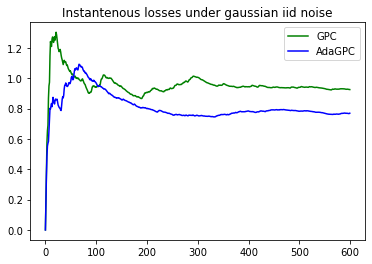

In [293]:
A,B = jnp.array([[1.,.5], [0,1.]]), jnp.array([[0],[1.2]])

ada = Adaptive(T, base_controller=GPC, A=A, B=B)
gpc = GPC(A, B)

gpc_errs = get_errs(T, gpc, A, B, "normal")
print("GPC incurs ", np.mean(gpc_errs), " loss under gaussian iid noise")

ada_errs = get_errs(T, ada, A, B, "normal")
print("AdaGPC incurs ", np.mean(ada_errs), " loss under gaussian iid noise")

plt.title("Instantenous losses under gaussian iid noise")
plt.plot(cummean(gpc_errs), "green", label = "GPC")
plt.plot(cummean(ada_errs), "blue", label = "AdaGPC")
plt.legend();

  0%|          | 0/599 [00:00<?, ?it/s]

GPC incurs  1.6867011664062739  loss under intermittent sine noise


100%|██████████| 599/599 [01:54<00:00,  5.25it/s]

AdaGPC incurs  1.158390645502756  loss under intermittent sine noise


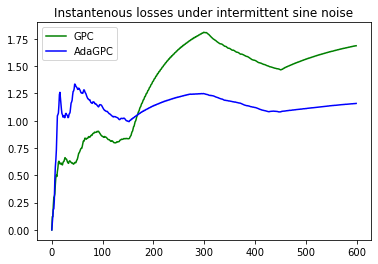

In [305]:
A,B = jnp.array([[1.,.5], [0,1.]]), jnp.array([[0],[1.2]])

ada = Adaptive(T, base_controller=GPC, A=A, B=B)
gpc = GPC(A, B)

gpc_errs = get_errs(T, gpc, A, B, "sine")
print("GPC incurs ", np.mean(gpc_errs), " loss under intermittent sine noise")

ada_errs = get_errs(T, ada, A, B, "sine")
print("AdaGPC incurs ", np.mean(ada_errs), " loss under intermittent sine noise")

plt.title("Instantenous losses under intermittent sine noise")
plt.plot(cummean(gpc_errs), "green", label = "GPC")
plt.plot(cummean(ada_errs), "blue", label = "AdaGPC")
plt.legend();